**GOAL:** We will classify small images cifar10 dataset from tensorflow keras datasets. 

In [3]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

## Loading the data

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 71s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_test.shape

(10000, 1)

In [9]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

it's shape is of two dimensions hence let's convert it into one dimension by reshaping it.

In [13]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [15]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

+ **for our data, the name of the labels are given as:**

In [16]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

+ let's plot some images by using imshaow

In [21]:
def show_image(X, y, index):
    plt.figure(figsize = (8,5))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

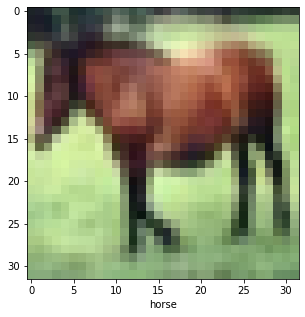

In [23]:
show_image(X_train, y_train, 7)

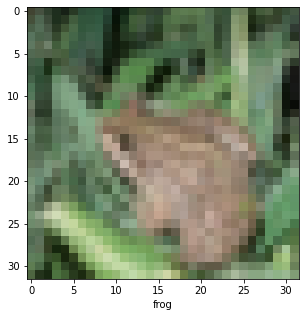

In [24]:
show_image(X_test, y_test, 4)

In [25]:
X_train.max()

255

In [26]:
X_test.max()

255

+ Let's now normalises the image in between 0 & 1.

In [27]:
X_test = X_test/255
X_train = X_train/255

### use of ANN for image classification

In [34]:
ann_model = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(500, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann_model.compile(optimizer = 'SGD',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])

ann_model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 294s 181ms/step - loss: 1.8226 - accuracy: 0.3465
Epoch 2/5
1563/1563 [==============================] - 290s 185ms/step - loss: 1.6238 - accuracy: 0.4224
Epoch 3/5
1563/1563 [==============================] - 300s 192ms/step - loss: 1.5370 - accuracy: 0.4535
Epoch 4/5
1563/1563 [==============================] - 316s 202ms/step - loss: 1.4719 - accuracy: 0.4788
Epoch 5/5
1563/1563 [==============================] - 291s 186ms/step - loss: 1.4208 - accuracy: 0.4972


In [36]:
from sklearn.metrics import classification_report, accuracy_score

In [37]:
y_pred = ann_model.predict(X_test)

313/313 [==============================] - 24s 68ms/step


In [39]:
y_pred_classes = [np.argmax(element) for element in y_pred]
print(f'classification report : {classification_report(y_test, y_pred_classes)}')

classification report :               precision    recall  f1-score   support

           0       0.73      0.37      0.49      1000
           1       0.67      0.41      0.51      1000
           2       0.47      0.26      0.34      1000
           3       0.33      0.33      0.33      1000
           4       0.60      0.13      0.21      1000
           5       0.39      0.39      0.39      1000
           6       0.52      0.55      0.53      1000
           7       0.37      0.71      0.49      1000
           8       0.71      0.42      0.53      1000
           9       0.32      0.81      0.46      1000

    accuracy                           0.44     10000
   macro avg       0.51      0.44      0.43     10000
weighted avg       0.51      0.44      0.43     10000



+ Less accuracy of the model hence i have to go for CNN model

### CNN for image classification

In [42]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [43]:
cnn_model.compile(optimizer = 'adam',
                 loss = 'sparse_categorical_crossentropy',
                 metrics = 'accuracy')

In [45]:
cnn_model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 197s 111ms/step - loss: 1.5126 - accuracy: 0.4531 - val_loss: 1.2590 - val_accuracy: 0.5546
Epoch 2/10
1563/1563 [==============================] - 141s 90ms/step - loss: 1.1516 - accuracy: 0.5949 - val_loss: 1.0718 - val_accuracy: 0.6246
Epoch 3/10
1563/1563 [==============================] - 143s 92ms/step - loss: 1.0088 - accuracy: 0.6486 - val_loss: 1.0321 - val_accuracy: 0.6415
Epoch 4/10
1563/1563 [==============================] - 143s 91ms/step - loss: 0.9272 - accuracy: 0.6799 - val_loss: 0.9828 - val_accuracy: 0.6561
Epoch 5/10
1563/1563 [==============================] - 143s 92ms/step - loss: 0.8652 - accuracy: 0.6994 - val_loss: 0.9372 - val_accuracy: 0.6797
Epoch 6/10
1563/1563 [==============================] - 144s 92ms/step - loss: 0.8064 - accuracy: 0.7200 - val_loss: 0.9539 - val_accuracy: 0.6752
Epoch 7/10
1563/1563 [==============================] - 143s 92ms/step - loss: 0.7579 - accuracy: 0.7359 - val_loss: 

<AxesSubplot:>

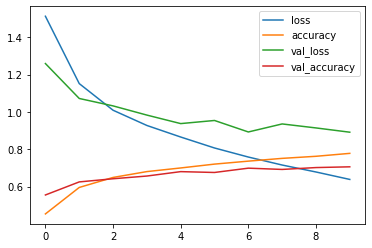

In [47]:
losses  = pd.DataFrame(cnn_model.history.history)
losses.plot()

+ Getting model accuracy upto 78 percent where as validation accuracy is arround 71 percent
+ Accuracy is upto acceptable limit

In [48]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 11s 34ms/step - loss: 0.8910 - accuracy: 0.7055


[0.8910276293754578, 0.7055000066757202]

In [50]:
y_pred = cnn_model.predict(X_test)
y_pred = [np.argmax(element) for element in y_pred]
y_pred[:5]

313/313 [==============================] - 11s 33ms/step


[3, 8, 8, 0, 6]

In [51]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

+ **Getting first 5 prediction exacly equal to test values**

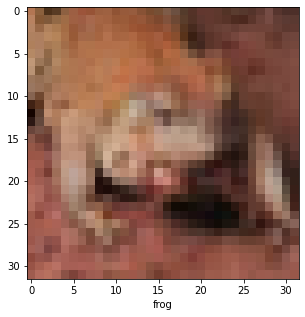

In [53]:
show_image(X_test, y_test, 5)

In [54]:
classes[y_pred[5]]

'frog'

+ __Getting same prediction__

## Thank You